In [1]:
%load_ext autoreload
%autoreload 2

# Clase Tutorial 8: Introducción a  <img src="/home/linar/Desktop/ML/Clases/i302/Clases/08_Clase_8:PyTorch/images/pytorch.svg" alt="image" style="max-width: 3%; height: auto;"> PyTorch 

## ¿Qué es PyTorch? 

PyTorch es una biblioteca de código abierto para el aprendizaje automático desarrollada por Facebook AI Research que permite crear redes neuronales de manera sencilla y flexible. Esta herramienta se puede utilizar tanto en CPUs como en GPUs, lo que facilita el desarrollo y la implementación de modelos de aprendizaje profundo.

## ¿Por qué elegir PyTorch?

A pesar de que existen otros frameworks como TensorFlow, PyTorch se ha convertido en una opción preferida para muchos investigadores y desarrolladores. A continuación, se presentan algunas de las razones por las cuales se elige PyTorch:

1. ⭐ **Facilidad de uso**: 
   - La creación de redes neuronales en PyTorch es más "Pythonic", lo que significa que se asemeja más a la forma en que escribimos código en Python. Esto hace que sea más accesible para quienes están familiarizados con este lenguaje.
   - La API de PyTorch es intuitiva, lo que facilita la comprensión y el uso de sus funciones.

2. ⭐ **Mejor capacidad de depuración**: 
   - PyTorch utiliza un grafo computacional dinámico, lo que permite realizar cambios sobre la marcha. Esto contrasta con TensorFlow, que utiliza un grafo estático. Esta flexibilidad, junto con la sintaxis más natural de PyTorch, hace que la depuración sea más sencilla y eficiente.

3. ⭐ **Popularidad creciente**: 
   - En los últimos años, PyTorch ha ganado mucha popularidad en la comunidad de aprendizaje automático. Es el framework predominante en muchos artículos de investigación y en bibliotecas como Hugging Face, lo que indica su amplia aceptación y uso en el campo.


Para instalar la última versión de PyTorch, ver el [este instructivo](https://pytorch.org/get-started/locally/).

## [PyTorch Tensors](https://pytorch.org/docs/stable/tensors.html)

- Los tensores son una estructura de datos especializada, muy similar a los arrays y matrices. 
- En PyTorch, usamos tensores para <span style="color: purple;">codificar las entradas y salidas de un modelo, así como los parámetros del mismo</span>.
- Los tensores son parecidos a los ndarrays de NumPy, pero con la ventaja de que <span style="color: purple;">pueden ejecutarse en GPUs</span> u otro hardware especializado para acelerar los cálculos. 

In [2]:
import torch
import numpy as np

### Inicialización de Tensors

Los tensores se pueden inicializar de varias maneras. Por ejemplo:

**<span style="color: purple;">Directamente desde datos**

Los tensores se pueden crear directamente a partir de datos. El tipo de dato se infiere automáticamente.

In [3]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

**<span style="color: purple;">Desde un array de NumPy**

Los tensores se pueden crear a partir de arrays de NumPy (y viceversa, mirá el puente con NumPy).

In [4]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

**<span style="color: purple;">Desde otro Tensor**

El nuevo Tensor mantiene las propiedades (forma, tipo de dato) del Tensor original, a menos que se sobrescriban explícitamente.

In [7]:
x_data

tensor([[1, 2],
        [3, 4]])

In [6]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.6097, 0.3627],
        [0.8635, 0.9036]]) 



**<span style="color: purple;">Con valores aleatorios o constantes**

Aleatorios con `rand`, constantes a partir de `ones` o `zeros`.

In [8]:
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.6924, 0.4423, 0.8135],
        [0.6098, 0.1991, 0.1090]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### Atributos del Tensor

Los atributos del tensor describen su forma, tipo de dato y el dispositivo en el que están almacenados.

In [9]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### Operaciones con Tensores

- Existen [más de 100 operaciones](https://pytorch.org/docs/stable/torch.html) con tensores.
- Incluyen transposición, indexación, slicing, operaciones matemáticas, álgebra lineal, muestreo aleatorio y más.
- Cada una de estas operaciones <span style="color: purple;">se puede ejecutar en la GPU</span> (generalmente a velocidades más altas que en una CPU). 
    - Si usas Google Colab, asigná una GPU yendo a Edición > Configuración del cuaderno.

In [10]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
  print(f"Device tensor is stored on: {tensor.device}")

**<span style="color: purple;">Indexación y slicing al estilo de NumPy**

In [11]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


**<span style="color: purple;">Uniendo tensores**

- Podemos usar `torch.cat` para concatenar una secuencia de tensores a lo largo de una dimensión dada. 
- Esto significa que los tensores se apilan uno al lado del otro en la misma dimensión, manteniendo las demás dimensiones igual.

In [12]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


- También podemos usar `torch.stack`, otra operación para unir tensores que es sutilmente diferente: apila los tensores a lo largo de una nueva dimensión. 
- Esto crea un nuevo tensor en el que los tensores originales se organizan en una nueva dimensión, aumentando así la cantidad de dimensiones del tensor resultante.

In [13]:
t1 = torch.stack([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]]])


**<span style="color: purple;">Multiplicando tensores**

Multiplicación elemento a elemento:

In [14]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


Multiplicación matricial entre dos tensores:

In [16]:
print(f"tensor.matmul(tensor) \n {tensor.matmul(tensor)} \n")
# Alternative syntax:
print(f"tensor @ tensor \n {tensor @ tensor}")

tensor.matmul(tensor) 
 tensor([[3., 0., 3., 3.],
        [3., 0., 3., 3.],
        [3., 0., 3., 3.],
        [3., 0., 3., 3.]]) 

tensor @ tensor 
 tensor([[3., 0., 3., 3.],
        [3., 0., 3., 3.],
        [3., 0., 3., 3.],
        [3., 0., 3., 3.]])


**<span style="color: purple;">Operaciones in-place**

Las operaciones que tienen un sufijo _ son in-place. 

- Esto quiere decir que <span style="color: purple;">modifica directamente el contenido del objeto o tensor en el que se está aplicando</span>, en lugar de crear una copia nueva con el resultado de la operación.
- Por ejemplo: `x.copy_(y)` o `x.t_()` cambiarán el valor de x.
- Las operaciones in-place ahorran algo de memoria, pero pueden ser problemáticas al calcular derivadas debido a la pérdida inmediata de historial. Por eso, su uso no se recomienda.

In [19]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]]) 

tensor([[11., 10., 11., 11.],
        [11., 10., 11., 11.],
        [11., 10., 11., 11.],
        [11., 10., 11., 11.]])


### Relación con NumPy

- Los Tensores en la CPU y los arrays de NumPy pueden compartir sus ubicaciones de memoria subyacentes, y cambiar uno afectará al otro.

**<span style="color: purple;">Tensor a NumPy Array**

In [20]:
t = torch.ones(5)
print(f"Torch: {t}")
n = t.numpy()
print(f"Numpy: {n}")

Torch: tensor([1., 1., 1., 1., 1.])
Numpy: [1. 1. 1. 1. 1.]


➡️ Veamos como un cambio en el Tensor se refleja en el array de NumPy:

In [21]:
t.add_(1)
print(f"Torch: {t}")
print(f"Numpy: {n}")

Torch: tensor([2., 2., 2., 2., 2.])
Numpy: [2. 2. 2. 2. 2.]


**<span style="color: purple;">NumPy Array a Tensor**

In [22]:
n = np.ones(5)
t = torch.from_numpy(n)
print(f"Torch: {t}")
print(f"Numpy: {n}")

Torch: tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
Numpy: [1. 1. 1. 1. 1.]


➡️ Los cambios en el array de NumPy se reflejan en el Tensor:

In [23]:
np.add(n, 1, out=n)
print(f"Torch: {t}")
print(f"Numpy: {n}")

Torch: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
Numpy: [2. 2. 2. 2. 2.]


## [Datasets y DataLoaders](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset)

- El código para procesar nuestras muestras de datos puede volverse desordenado y difícil de mantener rápidamente.
- Idealmente, queremos que nuestro código sobre el conjunto de datos esté desacoplado del código de entrenamiento del modelo para mejorar la legibilidad y la modularidad.
- PyTorch proporciona dos primitivas de datos: `torch.utils.data.DataLoader` y `torch.utils.data.Dataset` que permiten usar datasets pre-cargados o propios.
    - `Dataset`: almacena las muestras y sus etiquetas correspondientes.
    - `DataLoader`: envuelve un iterable alrededor del `Dataset` para facilitar el acceso a las muestras. Es fundamental para:
        - <span style="color: purple;">Manejar conjuntos de datos grandes</span> (no siempre se pueden cargar en memoria de una, este permite cargar los datos de manera paulatina en batches)
        - <span style="color: purple;">Cargar datos</span> de forma eficiente <span style="color: purple;">en minibatches</span> (automatiza este proceso de crear y gestionar los minibatches).
        - Asegurar que los <span style="color: purple;">datos se procesen en paralelo</span> para optimizar el tiempo de entrenamiento (cargar datos puede ser un bottleneck si el proceso de carga es lento).
        - Aplicar <span style="color: purple;">transformaciones automáticamente</span> (como normalización, recorte de imágenes, etc.) a medida que se cargan los datos.
        - <span style="color: purple;">Facilitar el uso de GPUs</span> (transferiere los datos desde la CPU a la GPU).
- Las bibliotecas en PyTorch ofrecen datasets integrados de alta calidad que podés usar en `Dataset`. Estos están disponibles actualmente en:
    - [torchvision](https://pytorch.org/vision/stable/index.html)
    - [torchaudio](https://pytorch.org/audio/stable/index.html)
    - [torchtext](https://pytorch.org/text/stable/index.html)
        - [Tutorial](https://pytorch.org/tutorials/recipes/recipes/loading_data_recipe.html) de como cargar la data.

### Cargando un Dataset

Ejemplo: Cargar el dataset [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) desde TorchVision. 

<img src="/home/linar/Desktop/ML/Clases/i302/Clases/08_Clase_8:PyTorch/images/fashion-mnist-sprite.png" alt="image" style="display: block; margin: 0 auto; max-width: 50%; height: auto;">


- Fashion-MNIST es un conjunto de datos de imágenes de artículos de Zalando que consta de 60,000 ejemplos de entrenamiento y 10,000 ejemplos de prueba. 
- Cada ejemplo incluye una <span style="color: purple;">imagen en escala de grises de 28×28</span> y una etiqueta asociada de una de <span style="color: blue;">10 clases</span>.

Cargamos el conjunto de datos FashionMNIST con los siguientes parámetros:
- `root` es la ruta donde se almacenan los datos de entrenamiento/prueba.
- `train` especifica si es un conjunto de datos de entrenamiento o de prueba.
- `download=True` descarga los datos de internet si no están disponibles en `root`.
- `transform` y `target_transform` especifican las transformaciones de características y etiquetas.

In [24]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

### Iterando y Visualizando el Dataset

- Podemos indexar manualmente los Datasets como si fueran una lista: `training_data[index]`. 
- Usamos matplotlib para visualizar algunas muestras de nuestros datos de entrenamiento.

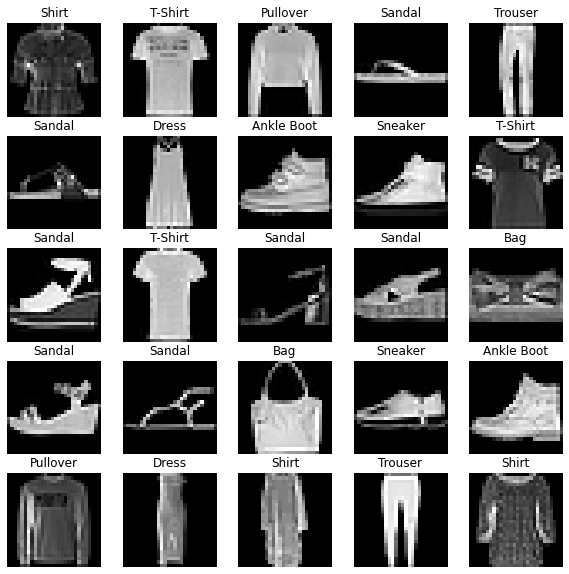

In [25]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(10, 10))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Creando un Dataset Personalizado para tus archivos

- Una clase de Dataset personalizada debe implementar tres funciones: `__init__`, `__len__` y `__getitem__`. 
- En la siguiente implementación, las imágenes de FashionMNIST se almacenan en un directorio `img_dir`, y sus etiquetas se guardan por separado en un archivo CSV `annotations_file`.

In [26]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

Desglosemos qué ocurre en cada una de las funciones:

1. `__init__`

- Se ejecuta una vez cuando se instancia el objeto `Dataset`. 
- Inicializamos el directorio que contiene las imágenes, el archivo de labels y las transformaciones que pueden tener.

    El archivo `labels.csv` se ve así:

    >tshirt1.jpg, 0
    >
    >tshirt2.jpg, 0
    >
    >......
    >
    >ankleboot999.jpg, 9

In [27]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

2. `__len__`
- Devuelve la cantidad de muestras en nuestro conjunto de datos. Ejemplo:

In [28]:
def __len__(self):
    return len(self.img_labels)

3. `__getitem__`

- Carga y devuelve una muestra del dataset en el índice dado `idx`. 
- Basándose en el índice:
    1. Identifica la ubicación de la imagen en el disco
    2. La convierte en un tensor usando `read_image`
    3. Recupera la etiqueta correspondiente del archivo CSV en `self.img_labels`
    4. Aplica las funciones de transformación (si corresponde) 
    5. Devuelve la imagen en formato Tensor y la etiqueta correspondiente en una tupla.



In [29]:
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label

### Preparando los datos para el entrenamiento con DataLoaders

- El Dataset recupera las features y labels de nuestro dataset de a una muestra. 
- Durante el entrenamiento de un modelo, generalmente queremos pasar muestras en “minibatches”, reshuffle los datos en cada época para reducir el overfitting del modelo, y usar multiprocesamiento en Python para acelerar la recuperación de datos.
- `DataLoader` es un iterable que abstrae esta complejidad y nos proporciona una API sencilla.

In [30]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

### Iterar a través del DataLoader

- Ya cargamos el dataset en el `DataLoader` y podemos iterar sobre el dataset según sea necesario. 
- Cada iteración a continuación devuelve un batch de `train_features` y `train_labels` (que contienen `batch_size=64` features y labels respectivamente). 
- Como especificamos `shuffle=True`, después de iterar sobre todos los lotes, los datos se mezclan. 
- Para un control más detallado sobre el orden de carga de los datos, ver [Samplers](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler).

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


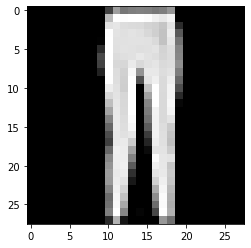

Label: Trouser


In [36]:
# Display image and label
train_features, train_labels = next(iter(train_dataloader)) # Obtiene un batch del dataloader para el entrenamiento
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {labels_map[label.item()]}")

La dimensión del batch `torch.Size([64, 1, 28, 28])`, se puede desglosar de la siguiente manera:

- **64**: Es el tamaño del batch, lo que significa que en este caso estamos procesando 64 imágenes a la vez.
- **1**: Representa la cantidad de canales. En este caso, las imágenes son en escala de grises (1 canal). Si fueran a color, el valor sería 3 para los canales RGB.
- **28**: Es la altura de cada imagen.
- **28**: Es el ancho de cada imagen.

## Transformaciones

- Los datos no siempre vienen en su forma final procesada que se requiere para entrenar algoritmos de machine learning. 
- Usamos transformaciones para realizar algunas manipulaciones de los datos y hacerlos adecuados para el entrenamiento.
- Todos los datasets de TorchVision tienen dos parámetros: 
    - `transform` para modificar las características. 
    - `target_transform` para modificar las etiquetas.

- El módulo [torchvision.transforms](https://pytorch.org/vision/0.9/transforms.html) ofrece varias transformaciones comunes listas para usar.

- Las features de FashionMNIST están en formato de imagen PIL, y las etiquetas son números enteros. 
    - Para el entrenamiento, necesitamos que las <span style="color: purple;">features sean tensores normalizados</span> y las <span style="color: purple;">etiquetas sean tensores codificados en one-hot</span>. 
    - Para realizar estas transformaciones, usamos `ToTensor` y `Lambda`.

In [37]:
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

### ToTensor()

- `ToTensor()` convierte una imagen en formato PIL o un arreglo NumPy (`ndarray`) en un `FloatTensor`.
- Además, escala los valores de intensidad de los píxeles de la imagen al rango [0, 1], donde los píxeles originalmente tienen valores entre 0 y 255. 
- Es útil para normalizar las imágenes antes de entrenar modelos de ML.

### Lambda Transforms

- Las transformaciones `Lambda` aplican cualquier función definida por el usuario mediante una función lambda. 
- Ejemplo: definimos una función para <span style="color: purple;">convertir un entero en un tensor codificado en one-hot</span>. 

    1. Crea un tensor de ceros de tamaño 10 (la cantidad de etiquetas en nuestro conjunto de datos) 
    2. Llama a `scatter_`, que asigna el valor `1` en el índice correspondiente a la etiqueta `y`.

In [38]:
target_transform = Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(dim=0, 
                                                                                index=torch.tensor(y), value=1))

## Construcción de la Red Neuronal

- Las redes neuronales están compuestas por capas/módulos que realizan operaciones sobre los datos. 
- [torch.nn](https://pytorch.org/docs/stable/nn.html) proporciona todos los bloques de construcción necesarios para armar nuestra propia red neuronal. 
- Cada módulo en PyTorch es una subclase de [nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html). 
- <span style="color: purple;">Una red neuronal es un módulo en sí mismo que consiste en otros módulos (las capas)</span>. 
- Esta estructura anidada permite construir y gestionar arquitecturas complejas de manera sencilla.

A continuación vamos a construir una red neuronal para clasificar imágenes del dataset FashionMNIST.

### Dispositivo para Entrenamiento

Si queremos entrenar nuestro modelo en un acelerador de hardware como la GPU (Graphics Processor Unit) o MPS (Metal Performance Shaders) tenemos que verificar si [torch.cuda](https://pytorch.org/docs/stable/notes/cuda.html) o [torch.backends.mps](https://pytorch.org/docs/stable/notes/mps.html) están disponibles. Si no lo están, usamos la CPU.

In [39]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


### Definición de la Clase

- Definimos nuestra red neuronal subclasando `nn.Module`
- Inicializamos las capas de la red neuronal en `__init__`. 
- Cada subclase de `nn.Module` implementa las operaciones sobre los datos de entrada en el método `forward`.

In [40]:
from torch import nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

Creamos una instancia de `NeuralNetwork`, la movemos al dispositivo correspondiente (GPU o CPU), y mostramos su estructura con un `print`.

In [41]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


- Para usar el modelo, le tenemos que pasar los datos de entrada. 
- Esto va a ejecutar el método `forward` del modelo, junto con [algunas operaciones](https://github.com/pytorch/pytorch/blob/270111b7b611d174967ed204776985cefca9c144/torch/nn/modules/module.py#L866) en segundo plano. 
    - No llamar directamente a `model.forward()`!
        - Al hacer esto, PyTorch también maneja el seguimiento del gradiente y otras operaciones necesarias para el entrenamiento, como la actualización de los parámetros del modelo. Si llamamos a `model.forward()` directamente, podemos omitir estas funciones automáticas, lo que podría llevar a errores o un comportamiento inesperado en el modelo.

- Al llamar al modelo con la entrada, obtenemos un tensor de 2 dimensiones:
    - `dim=0`: las 10 predicciones crudas para cada clase 
    - `dim=1`: valores individuales de cada salida. 
    
- Obtenemos las probabilidades de predicción al pasar el resultado a través de una instancia del módulo `nn.Softmax`.

In [42]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([5])


### Capas del Modelo

Vamos a desglosar las capas de nuestro modelo de FashionMNIST. 

- Para ilustrarlo, vamos a tomar un minibatch de 3 imágenes de tamaño 28x28.
- Veamos qué sucede al pasarlas a través de la red.

In [43]:
input_image = torch.rand(3, 28, 28)
print(input_image.size())

torch.Size([3, 28, 28])


#### [nn.Flatten](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html)

- Inicializamos la capa `nn.Flatten` para convertir cada imagen 2D de 28x28 en un array contiguo de 784 valores de píxeles (se mantiene la dimensión del minibatch en `dim=0`). 
- Esto permite que la red neuronal procese las imágenes en forma de un vector unidimensional, lo que es necesario para las capas densas que seguirán.

<img src="/home/linar/Desktop/ML/Clases/i302/Clases/08_Clase_8:PyTorch/images/flatten.png" alt="image" style="display: block; margin: 0 auto; max-width: 50%; height: auto;">

In [44]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


#### [nn.Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)

- La capa lineal es un módulo que aplica una transformación lineal a la entrada utilizando sus pesos y biases almacenados. 

$$ y = xW^T+b$$

- Toma el vector de entrada (en este caso, el vector de 784 elementos) y lo multiplica por una matriz de pesos, además de sumar un vector de sesgos, produciendo una salida que puede ser pasada a la siguiente capa en la red neuronal. 

In [45]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


#### [nn.ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)

- Las activaciones no lineales son las que crean los mapeos complejos entre las entradas y salidas del modelo. 
- Se aplican después de las transformaciones lineales para introducir no linealidad, lo que ayuda a las redes neuronales a aprender una amplia variedad de fenómenos.
- En este modelo, usamos `nn.ReLU` entre nuestras capas lineales, pero hay otras funciones de activación que también puedes usar para introducir no linealidad en tu modelo. 

In [46]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.2845,  0.1034, -0.5583, -0.1069,  0.4049, -0.2398, -0.4524,  0.8569,
         -0.0812, -0.4609, -0.2580,  0.3751,  0.2451, -0.0269, -0.5808,  0.1744,
          0.2599, -0.2401,  0.1462, -0.3654],
        [ 0.2873,  0.0985, -0.3930, -0.3281,  0.6824, -0.0267, -0.4630,  1.1176,
         -0.0239, -0.4469, -0.1497, -0.0877,  0.1032, -0.3392, -0.5915, -0.0302,
          0.6828, -0.3431,  0.2226, -0.1506],
        [-0.0958,  0.2676, -0.5039, -0.3104,  0.5448, -0.2476, -0.2706,  1.0370,
          0.5220, -0.1157, -0.1697,  0.2328,  0.3858, -0.2588, -0.5347,  0.1744,
          0.3991, -0.1479,  0.3341, -0.2112]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.2845, 0.1034, 0.0000, 0.0000, 0.4049, 0.0000, 0.0000, 0.8569, 0.0000,
         0.0000, 0.0000, 0.3751, 0.2451, 0.0000, 0.0000, 0.1744, 0.2599, 0.0000,
         0.1462, 0.0000],
        [0.2873, 0.0985, 0.0000, 0.0000, 0.6824, 0.0000, 0.0000, 1.1176, 0.0000,
         0.0000, 0.0000, 0.0000, 0.1032, 0.0000, 0.00

#### [nn.Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html)

- Es un contenedor ordenado de módulos. 
- Los datos se pasan a través de todos los módulos en el mismo orden en que están definidos. 
- Simplifica la creación de redes neuronales al permitirte apilar capas de manera sencilla y clara, sin tener que definir manualmente el flujo de datos en el método `forward`. 
- Es útil para modelos más simples donde el flujo es lineal.

In [47]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

#### [nn.Softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html)

- La última capa lineal de la red neuronal devuelve logits.
    - Logits: valores crudos en el rango $[-\infty, \infty]$. 
- Estos logits se pasan al módulo `nn.Softmax`. 
    - La función `Softmax` escala los logits a valores en el rango $[0, 1]$, representando las probabilidades predichas por el modelo para cada clase.

<img src="/home/linar/Desktop/ML/Clases/i302/Clases/08_Clase_8:PyTorch/images/logits.jpg" alt="image" style="display: block; margin: 0 auto; max-width: 50%; height: auto;">

El parámetro `dim` indica la dimensión a lo largo de la cual los valores deben sumar 1, asegurando que las probabilidades de todas las clases en la salida se normalicen correctamente. Esto es crucial para tareas de clasificación, ya que permite interpretar las salidas del modelo como probabilidades.

In [48]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

In [49]:
print("Example for image 1:\n")
print(f"Logits:\n {logits[0]}")
print(f"Probabilities:\n {pred_probab[0]}\n")
print(f"Sum of probabilities (after Softmax): {int(pred_probab[0].sum())}")
print(f"Class predicted: {pred_probab[0].argmax()}")

Example for image 1:

Logits:
 tensor([ 0.0594, -0.1111,  0.1342, -0.0597,  0.1592,  0.1398,  0.0771, -0.1018,
        -0.1260, -0.0096], grad_fn=<SelectBackward0>)
Probabilities:
 tensor([0.1038, 0.0876, 0.1119, 0.0922, 0.1147, 0.1125, 0.1057, 0.0884, 0.0863,
        0.0969], grad_fn=<SelectBackward0>)

Sum of probabilities (after Softmax): 0
Class predicted: 4


### Parámetros del Modelo

- Como sabemos, muchas capas dentro de una red neuronal son paramétricas (tienen pesos y sesgos asociados que se optimizan durante el entrenamiento). 
- Al subclasear `nn.Module`, se rastrean automáticamente todos los campos definidos dentro del objeto de modelo, y <span style="color: purple;">todos los parámetros son accesibles</span> mediante los métodos `parameters()` o `named_parameters()` de tu modelo.

- En este ejemplo, iteramos sobre cada parámetro y mostramos su tamaño y una vista previa de sus valores.
- Esto es útil para entender la estructura del modelo y verificar que los parámetros se están inicializando correctamente antes del entrenamiento.

In [50]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0011, -0.0268, -0.0200,  ..., -0.0181, -0.0349,  0.0021],
        [ 0.0151,  0.0306,  0.0271,  ..., -0.0125, -0.0217,  0.0228]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([ 0.0324, -0.0330], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0131,  0.0176, -0.0162,  ..., -0.0242, -0.0087, -0.0419],
        [ 0.0337,  0.0382, -0.0267,  ..., -0.0251,  0.0366,  0.0076]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | 

En la capa Flatten:
- `start_dim=1`: Comienza a aplanar desde la dimensión 1 (es decir, ignora la dimensión 0, que generalmente corresponde al tamaño del batch).
- `end_dim=-1`: Aplana hasta la última dimensión del tensor. El valor -1 se refiere a la última dimensión automáticamente, sin importar cuántas dimensiones tenga el tensor.

## Diferenciación Automática con `torch.autograd`

- Al entrenar redes neuronales, el algoritmo más utilizado es la retropropagación. 
- En este algoritmo, se ajustan los parámetros (pesos del modelo) de acuerdo con el gradiente de la función de pérdida con respecto al parámetro dado.
- Para calcular esos gradientes, PyTorch tiene un motor de diferenciación incorporado llamado `torch.autograd`. Este motor <span style="color: purple;">soporta el cálculo automático del gradiente para cualquier grafo computacional</span> .

Consideremos la red neuronal más simple, que tiene una sola capa con entrada $x$, parámetros $w$ y $b$, y una función de pérdida. Esto se puede definir en PyTorch de la siguiente manera:

In [51]:
x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

### Tensores, Funciones y Grafo Computacional

Este código define el siguiente grafo computacional:

<img src="/home/linar/Desktop/ML/Clases/i302/Clases/08_Clase_8:PyTorch/images/comp-graph.png" alt="image" style="display: block; margin: 0 auto; max-width: 50%; height: auto;">

- En esta red, $w$ y $b$ son parámetros que necesitamos optimizar. 
- Por lo tanto, debemos poder calcular los gradientes de la función de pérdida con respecto a esas variables. 
- Para hacer esto, establecemos la propiedad `requires_grad` de esos tensores.
    - Al configurar `requires_grad=True`, indicamos a PyTorch que queremos calcular y almacenar los gradientes de estos tensores durante el proceso de backpropagation. 
    - Esto es esencial para actualizar los parámetros del modelo utilizando algoritmos de optimización como el descenso de gradiente. 
    - Así, cada vez que realicemos una operación con estos tensores, PyTorch construirá el grafo computacional necesario para calcular los gradientes automáticamente.
- **NOTA**: Podés establecer el valor de `requires_grad` al crear un tensor, o hacerlo más tarde usando el método `x.requires_grad_(True)`.

- Una función que aplicamos a tensores para construir el grafo computacional es, de hecho, un objeto de la clase `Function`. 
- Este objeto sabe cómo calcular la función en la dirección hacia adelante y también cómo calcular su derivada durante el paso de retropropagación. 
- Una referencia a la función de backpropagation se almacena en la propiedad `grad_fn` de un tensor.

In [52]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x7f80c9172ee0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7f80c9172e80>


### Computando Gradientes  
- Para optimizar los pesos de los parámetros en la red neuronal, necesitamos calcular las derivadas de nuestra función de pérdida con respecto a los parámetros
    - Es decir, necesitamos $\frac{\partial \text{Loss}}{\partial w}$ y $\frac{\partial \text{Loss}}{\partial b}$ bajo algunos valores fijos de $x$ e $y$. 
- Para calcular esas derivadas, llamamos a `loss.backward()`, y luego recuperamos los valores de `w.grad` y `b.grad`:

In [53]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.0042, 0.0032, 0.0116],
        [0.0042, 0.0032, 0.0116],
        [0.0042, 0.0032, 0.0116],
        [0.0042, 0.0032, 0.0116],
        [0.0042, 0.0032, 0.0116]])
tensor([0.0042, 0.0032, 0.0116])


**NOTA**: Solo los nodos que son considerados "hoja" (es decir, aquellos que no tienen otros nodos como dependencias) y que tienen la propiedad `requires_grad` activada pueden proporcionar información sobre sus gradientes. Para todos los demás nodos en nuestro grafo, los gradientes no estarán disponibles.

Además, cuando llamamos a `backward()` para calcular los gradientes, solo podemos hacerlo una vez por cada grafo. Si queremos calcular los gradientes varias veces en el mismo grafo, debemos usar el parámetro `retain_graph=True`, lo que permite que el grafo se mantenga en memoria para cálculos futuros. Esto es útil para evitar que se pierda la información del grafo después de una primera pasada.

### Desactivando el seguimiento de gradientes  

- Por defecto, los tensores que tienen `requires_grad=True` guardan un registro de cómo se calcularon para poder hacer cálculos de gradientes. 
- Pero a veces, como cuando ya entrenamos el modelo y solo __queremos usarlo para hacer predicciones__, no necesitamos ese seguimiento. 
- Para evitarlo y hacer las cosas más rápidas, podemos usar un bloque `torch.no_grad()`, que desactiva temporalmente ese seguimiento mientras hacemos los cálculos.

In [54]:
z = torch.matmul(x, w) + b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w) + b
print(z.requires_grad)

True
False


Otra forma de lograr el mismo resultado es usar el método `detach()` en el tensor. 

In [55]:
z = torch.matmul(x, w) + b
z_det = z.detach()
print(z_det.requires_grad)

False


#### 🤔 ¿Por qué razones se les ocurre que podríamos querer desactivar el seguimiento de gradientes?

1. **Congelar parámetros**: Si queremos marcar algunos parámetros en nuestra red neuronal como parámetros congelados (es decir, que no se actualizarán durante el entrenamiento).

2. **Acelerar cálculos**: Cuando solo estamos haciendo forward propagation, las operaciones en tensores que no rastrean gradientes son más eficientes, lo que puede hacer que nuestros cálculos sean más rápidos.

### Más sobre gráficos computacionales

`autograd` es una herramienta en PyTorch que nos ayuda a calcular gradientes automáticamente. Imaginemos que todos nuestros datos (tensores) y las operaciones que hacemos con ellos forman un gráfico (grafo dirigido acíclico, DAG). Este gráfico tiene dos tipos de nodos: 

- **Hojas**: son nuestros datos de entrada.
- **Raíces**: son los resultados que obtenemos.

Cuando hacemos cálculos, `autograd` registra todo en este grafo. Así, podemos calcular los gradientes cuando los necesitemos.

**Pasos de funcionamiento:**

1. **Paso hacia adelante**: Cuando calculamos algo, `autograd` realiza la operación y guarda información sobre cómo hacerlo de nuevo si es necesario.
   
2. **Paso hacia atrás**: Cuando llamamos a `.backward()`, `autograd`:
   - Calcula los gradientes de todos los pasos que realizamos.
   - Guarda esos gradientes en los tensores correspondientes.
   - Propaga esos gradientes hacia los datos de entrada.

Esto nos permite optimizar los parámetros de nuestro modelo, ajustando los pesos para mejorar su rendimiento.

## Optimizando los Parámetros del Modelo

Ahora que tenemos un modelo y datos, es momento de entrenar, validar y probar nuestro modelo optimizando sus parámetros. El entrenamiento de un modelo es un proceso iterativo. En cada iteración tenemos:

1. **Predicción**: El modelo hace una estimación sobre el resultado.
2. **Cálculo de Error**: Se calcula el error de esa estimación (pérdida).
3. **Derivadas**: Se recolectan las derivadas del error con respecto a los parámetros del modelo.
4. **Optimización**: Se optimizan estos parámetros utilizando el descenso de gradiente.

Este proceso se repite varias veces hasta que el modelo mejora y se ajusta mejor a los datos.

### Hiperparámetros

- Recordemos que los hiperparámetros son parámetros ajustables que nos permiten controlar el proceso de optimización del modelo. Por ejemplo:

1. **Épocas**: Cuántas veces se itera sobre el conjunto de datos.

2. **Tamaño del Lote (Batch Size)**: La cantidad de muestras de datos que se propagan a través de la red antes de que se actualicen los parámetros.

3. **Tasa de Aprendizaje (Learning Rate)**: Cuánto se actualizan los parámetros del modelo en cada lote/época. 
    - Valores más pequeños resultan en una velocidad de aprendizaje lenta, mientras que valores grandes pueden llevar a comportamientos impredecibles durante el entrenamiento.

In [56]:
epochs = 5
batch_size = 64
learning_rate = 1e-3

### Bucle de Optimización

- Una vez que establecemos nuestros hiperparámetros, podemos entrenar y optimizar nuestro modelo con un bucle de optimización.

- Cada época (1 iteración del bucle) consta de dos partes principales:

    1. **Bucle de Entrenamiento**: Iterar sobre el set de entrenamiento y tratar de converger hacia parámetros óptimos.

    2. **Bucle de Validación/Test**: Iterar sobre el set de prueba para verificar si el rendimiento del modelo está mejorando.


#### Función de Pérdida

- Mide el grado de disimilitud entre el resultado obtenido y el valor objetivo. 
- Es esta función la que queremos minimizar durante el entrenamiento. 
- [Ver todas las loss functions de Pytorch](https://pytorch.org/docs/stable/nn.html#loss-functions).

Para nuestra red, vamos a pasar los logits de salida de nuestro modelo a [nn.CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss), que normaliza los logits y calcula el error de predicción.


In [57]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

#### Optimizador

- Toda la lógica de optimización está encapsulada en el objeto `optimizer`. 
- En este ejemplo utilizamos el optimizador SGD.
- Hay muchos otros [optimizadores disponibles en PyTorch](https://pytorch.org/docs/stable/optim.html), como ADAM y RMSProp, que funcionan mejor para diferentes tipos de modelos y datos.
- Inicializamos el optimizador registrando los parámetros del modelo que deben ser entrenados y pasando el hiperparámetro de la tasa de aprendizaje.

In [58]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Dentro del bucle de entrenamiento, la optimización ocurre en tres pasos:

1. Llamar a `optimizer.zero_grad()` para <span style="color: purple;">restablecer los gradientes de los parámetros</span> del modelo. Por defecto, los gradientes se suman. Para evitar contar dos veces, los reiniciamos en cada iteración.

2. <span style="color: purple;">Retropropagar la pérdida de la predicción</span> con una llamada a `loss.backward()`. PyTorch guarda los gradientes de la pérdida con respecto a cada parámetro.

3. Una vez que tenemos nuestros gradientes, llamamos a `optimizer.step()` para <span style="color: purple;">ajustar los parámetros</span> según los gradientes recogidos en la retropropagación.

#### Implementación Completa

Definimos el `train_loop` que itera sobre nuestro código de optimización, y el `test_loop` que evalúa el rendimiento del modelo con respecto a nuestros datos de prueba.

In [59]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)  # Obtener el tamaño del conjunto de datos
    # Configura el modelo en modo de entrenamiento: importante para batch normalization y dropout
    # Aunque no es necesario en esta situación, se incluye por buenas prácticas
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X) # Realiza la predicción usando el modelo
        loss = loss_fn(pred, y)  # Calcula la pérdida comparando la predicción con las etiquetas verdaderas

        # Retropropagación
        loss.backward()  # Calcula los gradientes de la pérdida con respecto a los parámetros del modelo
        optimizer.step()  # Actualiza los parámetros del modelo usando los gradientes
        optimizer.zero_grad()  # Reinicia los gradientes para la siguiente iteración

        # Imprimir cada 100 lotes
        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)  # Obtener la pérdida y la posición actual
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")  # Imprimir la pérdida y el progreso

def test_loop(dataloader, model, loss_fn):
    # Configura el modelo en modo de evaluación: importante para batch normalization y dropout
    # Aunque no es necesario en esta situación, se incluye por buenas prácticas
    model.eval()
    size = len(dataloader.dataset)  # Obtener el tamaño del conjunto de datos
    num_batches = len(dataloader)  # Obtener el número de lotes
    test_loss, correct = 0, 0  # Inicializar la pérdida de prueba y el contador de aciertos

    # Evaluar el modelo sin calcular gradientes para reducir el uso de memoria
    # Esto asegura que no se calculen gradientes durante el modo de prueba
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)  # Realiza la predicción usando el modelo
            test_loss += loss_fn(pred, y).item()  # Sumar la pérdida de prueba
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()  # Contar aciertos comparando predicciones con etiquetas verdaderas

    test_loss /= num_batches  # Calcular la pérdida promedio de prueba
    correct /= size  # Calcular la precisión
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")  # Imprimir precisión y pérdida promedio

Inicializamos la función de pérdida y el optimizador, y los pasamos a `train_loop` y `test_loop`.

In [60]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 1
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.310758  [   64/60000]
loss: 2.289955  [ 6464/60000]
loss: 2.280777  [12864/60000]
loss: 2.274449  [19264/60000]
loss: 2.245030  [25664/60000]
loss: 2.246209  [32064/60000]
loss: 2.217553  [38464/60000]
loss: 2.199668  [44864/60000]
loss: 2.186793  [51264/60000]
loss: 2.194147  [57664/60000]
Test Error: 
 Accuracy: 46.3%, Avg loss: 2.167669 

Done!


### Guardar y Cargar el Modelo

Los modelos de PyTorch almacenan los parámetros aprendidos en un diccionario de estado interno, llamado `state_dict`. Estos pueden ser guardados mediante el método `torch.save`:

In [61]:
# Guardar el modelo
torch.save(model.state_dict(), '/home/linar/Desktop/ML/Clases/i302/Clases/08_Clase_8:PyTorch/models/model_weights.pth')

Para cargar los pesos del modelo, primero necesitas crear una instancia del mismo modelo y luego cargar los parámetros usando el método `load_state_dict()`.

En el código a continuación, establecemos `weights_only=True` para limitar las funciones ejecutadas durante el deserializado solo a aquellas necesarias para cargar los pesos.

In [62]:
# Cargar el modelo
model = NeuralNetwork()
model.load_state_dict(torch.load("/home/linar/Desktop/ML/Clases/i302/Clases/08_Clase_8:PyTorch/models/model_weights.pth", weights_only=True))
#model.eval() # important to call before inferencing to set the dropout and batch normalization layers to evaluation mode (not applicable in this example)

<All keys matched successfully>

- Al cargar los pesos del modelo, necesitamos instanciar primero la clase del modelo, porque la clase define la estructura de una red. 
- Puede que queramos guardar la estructura de esta clase junto con el modelo, en cuyo caso podemos pasar el modelo (y no `model.state_dict()`) a la función de guardado:

In [63]:
torch.save(model, '/home/linar/Desktop/ML/Clases/i302/Clases/08_Clase_8:PyTorch/models/model.pth')

Luego, podemos cargar el modelo como se demuestra a continuación.

**NOTA**: Guardar `state_dict` se considera la mejor práctica. Sin embargo, a continuación usamos `weights_only=False` porque esto implica cargar el modelo, que es un caso de uso heredado para `torch.save`.

In [64]:
model = torch.load('/home/linar/Desktop/ML/Clases/i302/Clases/08_Clase_8:PyTorch/models/model.pth', weights_only=False)

## TensorBoard

PyTorch se integra con TensorBoard, una herramienta diseñada para visualizar los resultados de las sesiones de entrenamiento de redes neuronales.



### 1. Configuración de TensorBoard  

Empezamos configurando TensorBoard, importando `tensorboard` desde `torch.utils` y definiendo un `SummaryWriter`, nuestro objeto principal para escribir información en TensorBoard.

In [65]:
from torch.utils.tensorboard import SummaryWriter

# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/fashion_mnist_experiment_3')

Tengan en cuenta que esta línea por sí sola crea una carpeta `runs/fashion_mnist_experiment_3`.

### 2. Escribiendo en TensorBoard  
Ahora escribiremos una imagen en nuestro TensorBoard, específicamente una cuadrícula, usando [make_grid](https://pytorch.org/vision/stable/utils.html#torchvision.utils.make_grid).

Para ello, primero definimos una función para graficar una imagen usando `matplotlib`:

In [66]:
# Helper function to show an image
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

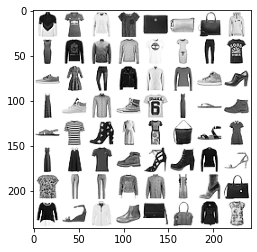

In [67]:
from torchvision import utils

# Get some random training images
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# Create grid of images
img_grid = utils.make_grid(images)

# Show images
matplotlib_imshow(img_grid, one_channel=True)

# "rite to tensorboard
writer.add_image('four_fashion_mnist_images', img_grid)

Una vez que ejecutes el siguiente comando, podrás abrir TensorBoard en tu navegador web accediendo a [localhost:6006](http://localhost:6006) (o la dirección que se muestre en la terminal).

`tensorboard --logdir=runs --bind_all`

In [58]:
#!tensorboard --logdir=runs --bind_all
#tensorboard --logdir=i302/Clases/08_Clase_8:PyTorch/runs --bind_all

### 3. Inspeccionar el modelo utilizando TensorBoard  
Una de las fortalezas de TensorBoard es su capacidad para visualizar estructuras de modelos complejas. Vamos a visualizar el modelo que construimos.

In [68]:
writer.add_graph(model, images)

### 4. Agregar un "Proyector" a TensorBoard  

Podemos visualizar la representación de datos de alta dimensionalidad en un espacio de menor dimensionalidad utilizando el método [add_embedding](https://pytorch.org/docs/stable/tensorboard.html#torch.utils.tensorboard.writer.SummaryWriter.add_embedding).

In [69]:
# Helper function
def select_n_random(data, labels, n=100):
    '''
    Selects n random datapoints and their corresponding labels from a dataset
    '''
    assert len(data) == len(labels)

    perm = torch.randperm(len(data))
    return data[perm][:n], labels[perm][:n]

# Select random images and their target indices
images, labels = select_n_random(training_data.data, training_data.targets)

# Get the class labels for each image
class_labels = [labels_map[lab.item()] for lab in labels]

# Log embeddings
features = images.view(-1, 28 * 28)
writer.add_embedding(features,
                    metadata=class_labels,
                    label_img=images.unsqueeze(1))

- Ahora, en la pestaña "Projector" de TensorBoard, podemos ver estas 100 imágenes —cada una de las cuales tiene 784 dimensiones— proyectadas en un espacio tridimensional. 
- Además, esta visualización es interactiva: podemos hacer clic y arrastrar para rotar la proyección en tres dimensiones. 
- Finalmente, un par de consejos para facilitar la visualización: seleccionen "color: label" en la parte superior izquierda, y activen el "modo nocturno", lo cual hará que las imágenes sean más fáciles de ver, ya que su fondo es blanco.

Ahora que inspeccionamos completamente nuestros datos, mostremos cómo TensorBoard puede hacer que el seguimiento del entrenamiento y la evaluación del modelo sea más claro, comenzando con el entrenamiento.

### 5. Seguimiento del entrenamiento del modelo con TensorBoard
- Antes, simplemente imprimimos la pérdida acumulada del modelo cada X iteraciones. 
- Ahora, registraremos la pérdida acumulada en TensorBoard, junto con una vista de las predicciones que el modelo está realizando a través de la función `plot_classes_preds`.

In [70]:
# Helper functions
def images_to_probs(model, images):
    '''
    Generates predictions and corresponding probabilities from a trained
    network and a list of images
    '''
    output = model(images)
    # Convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    preds = np.squeeze(preds_tensor.numpy())
    return preds, [torch.nn.functional.softmax(el, dim=0)[i].item() for i, el in zip(preds, output)]

In [71]:
def plot_classes_preds(model, images, labels):
    '''
    Generates matplotlib Figure using a trained network, along with images
    and labels from a batch, that shows the network's top prediction along
    with its probability, alongside the actual label, coloring this
    information based on whether the prediction was correct or not.
    Uses the "images_to_probs" function.
    '''
    preds, probs = images_to_probs(model, images)
    # Plotea las imágenes del batch junto con las etiquetas predichas y verdaderas
    fig = plt.figure(figsize=(12, 48))
    for idx in np.arange(4):
        ax = fig.add_subplot(1, 4, idx+1, xticks=[], yticks=[])
        matplotlib_imshow(images[idx], one_channel=True)
        ax.set_title("{0}, {1:.1f}%\n(label: {2})".format(
            labels_map[preds[idx].item()],  # Convertir tensor a entero
            probs[idx] * 100.0,
            labels_map[labels[idx].item()]),  # Convertir tensor a entero
                    color=("green" if preds[idx] == labels[idx].item() else "red"))
    return fig

Finalmente, entrenemos el modelo utilizando el mismo código de entrenamiento de antes, pero en lugar de imprimir los resultado, vamos a escribirlos en TensorBoard cada 100 batches usando la función `add_scalar`.

Además, mientras entrenamos, generaremos una imagen que mostrará las predicciones del modelo frente a los resultados reales en las cuatro imágenes incluidas en ese lote.

In [72]:
def train_loop(dataloader, model, loss_fn, optimizer, epoch):
    size = len(dataloader.dataset)  # Obtener el tamaño del conjunto de datos
    model.train()
    running_loss = 0.0  # Inicializar la pérdida acumulada
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)  # Realiza la predicción usando el modelo
        loss = loss_fn(pred, y)  # Calcula la pérdida

        # Retropropagación
        loss.backward()  # Calcula los gradientes
        optimizer.step()  # Actualiza los parámetros
        optimizer.zero_grad()  # Reinicia los gradientes

        running_loss += loss.item()  # Acumula la pérdida

        # Log a TensorBoard cada 100 lotes
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)  # Obtener la pérdida y la posición actual
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")  # Imprimir la pérdida
            
            writer.add_scalar('training loss',
                              running_loss / 1000,
                              epoch * len(dataloader) + batch)  # Registrar la pérdida
            writer.add_figure('predictions vs. actuals',
                            plot_classes_preds(model, X, y),
                            global_step=epoch * len(dataloader) + i)
                            
            running_loss = 0.0  # Reiniciar la pérdida acumulada

def test_loop(dataloader, model, loss_fn, epoch):
    model.eval()
    size = len(dataloader.dataset)  # Obtener el tamaño del conjunto de datos
    num_batches = len(dataloader)  # Obtener el número de lotes
    test_loss, correct = 0, 0  # Inicializar la pérdida de prueba y el contador de aciertos
    
    # Listas para acumular probabilidades y etiquetas
    all_probs = []
    all_labels = []

    # Evaluar el modelo sin calcular gradientes
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)  # Realiza la predicción
            test_loss += loss_fn(pred, y).item()  # Sumar la pérdida de prueba
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()  # Contar aciertos
            
            # Obtener probabilidades y etiquetas
            all_probs.append(pred.softmax(dim=1))  # Usar softmax para obtener probabilidades
            all_labels.append(y)  # Guardar las etiquetas reales

    test_loss /= num_batches  # Calcular la pérdida promedio de prueba
    correct /= size  # Calcular la precisión
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")  # Imprimir precisión y pérdida promedio

    # Log de la pérdida de prueba en TensorBoard
    writer.add_scalar('test loss',
                      test_loss,
                      epoch * num_batches)  # Registrar la pérdida de prueba

    # Concatenar todas las probabilidades y etiquetas
    test_probs = torch.cat(all_probs)  # Combinar todas las probabilidades
    test_labels = torch.cat(all_labels)  # Combinar todas las etiquetas

    return test_probs, test_labels  # Retornar las probabilidades y etiquetas


# Definimos la función de pérdida y el optimizador
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [73]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer, t)
    test_probs, test_label = test_loop(test_dataloader, model, loss_fn, t)

print("Done!")

Epoch 1
-------------------------------
loss: 2.174959  [    0/60000]
loss: 2.150274  [ 6400/60000]
loss: 2.133465  [12800/60000]
loss: 2.087193  [19200/60000]
loss: 2.088684  [25600/60000]
loss: 2.072410  [32000/60000]
loss: 2.070004  [38400/60000]
loss: 1.984126  [44800/60000]
loss: 2.018535  [51200/60000]
loss: 1.933559  [57600/60000]
Test Error: 
 Accuracy: 59.3%, Avg loss: 1.917648 

Epoch 2
-------------------------------
loss: 1.967867  [    0/60000]
loss: 1.892304  [ 6400/60000]
loss: 1.853612  [12800/60000]
loss: 1.738213  [19200/60000]
loss: 1.739571  [25600/60000]
loss: 1.732806  [32000/60000]
loss: 1.640030  [38400/60000]
loss: 1.667632  [44800/60000]
loss: 1.630083  [51200/60000]
loss: 1.570708  [57600/60000]
Test Error: 
 Accuracy: 62.3%, Avg loss: 1.546837 

Epoch 3
-------------------------------
loss: 1.533856  [    0/60000]
loss: 1.467806  [ 6400/60000]
loss: 1.525526  [12800/60000]
loss: 1.479278  [19200/60000]
loss: 1.464382  [25600/60000]
loss: 1.434726  [32000/600

- Podemos acceder a la pestaña "Scalars" para ver el training loss ploteado en tiempo real.
- Además, podemos observar las predicciones que el modelo hizo sobre batches arbitrarios a lo largo del proceso de aprendizaje. 
    - Ir la pestaña "Imágenes" y desplázarse hacia abajo en la visualización "predictions vs. actuals" para ver esto.

In [ ]:
# Helper function
def add_pr_curve_tensorboard(class_index, test_probs, test_label, global_step=0):
    '''
    Takes in a "class_index" from 0 to 9 and plots the corresponding
    precision-recall curve
    '''
    tensorboard_truth = test_label == class_index
    tensorboard_probs = test_probs[:, class_index]

    # Obtener el nombre de la clase desde labels_map
    class_name = labels_map[class_index]

    # Agregar la curva de precisión-recall a TensorBoard
    writer.add_pr_curve(class_name, 
                        tensorboard_truth, 
                        tensorboard_probs, 
                        global_step=global_step)

# Traza todas las curvas de precisión-recall
for i in range(len(labels_map)):
    add_pr_curve_tensorboard(i, test_probs, test_label)
